In [158]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from readTRC import readTrc
from scipy.fftpack import rfft, irfft, fftfreq

In [159]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def find_vals(X,Y,cut):
    dataX = X[cut:]
    dataY = Y[cut:]
    minn = min(dataY)
    sig_val = minn*0.5
    MeanLoc = np.where(dataY==minn)[0][0]
    Mean = dataX[MeanLoc]
    L = dataY[0:MeanLoc]
    R = dataY[MeanLoc:len(dataY)]
    LP =find_nearest(L,sig_val)
    RP =find_nearest(R,sig_val)
    whereL = np.where(L==LP)[0][0]
    whereR = np.where(R==RP)[0][0]
    Lpoint = dataX[whereL]
    Rpoint = dataX[MeanLoc+whereR]
    FWHM = (Rpoint-Lpoint)   
    return (Mean,FWHM)

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [160]:
cd /Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090518-circulation

/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090518-circulation


In [161]:
#PATH = '/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/'
files = glob.glob('*.txt')
#files.remove('.DS_Store')
files.sort()
files

['3bar-125-pump-off-long.txt',
 '3bar-125-pump-off.txt',
 '3bar-125-pump-on-20min.txt',
 '3bar-125-pump-on-210min-2.txt',
 '3bar-125-pump-on-210min.txt',
 '3bar-125-pump-on-310.txt',
 '3bar-125-pump-on-60min.txt',
 '3bar-125-pump-on.txt']

In [162]:
ml = 1e3
hold = np.loadtxt('3bar-125-pump-off.txt')
Xoff = hold[0]*ml
Yoff = hold[1]*ml

hold = np.loadtxt('3bar-125-pump-off-long.txt')
XoffL = hold[0]*ml
YoffL = hold[1]*ml

hold = np.loadtxt('3bar-125-pump-on.txt')
Xon = hold[0]*ml
Yon = hold[1]*ml

hold = np.loadtxt('3bar-125-pump-on-20min.txt')
Xon20 = hold[0]*ml
Yon20 = hold[1]*ml

hold = np.loadtxt('3bar-125-pump-on-60min.txt')
Xon60 = hold[0]*ml
Yon60 = hold[1]*ml

hold = np.loadtxt('3bar-125-pump-on-210min-2.txt')
Xon210 = hold[0]*ml
Yon210 = hold[1]*ml
hold = np.loadtxt('3bar-125-pump-on-310.txt')
Xon310 = hold[0]*ml
Yon310 = hold[1]*ml

In [163]:
a=hold[0]*ml

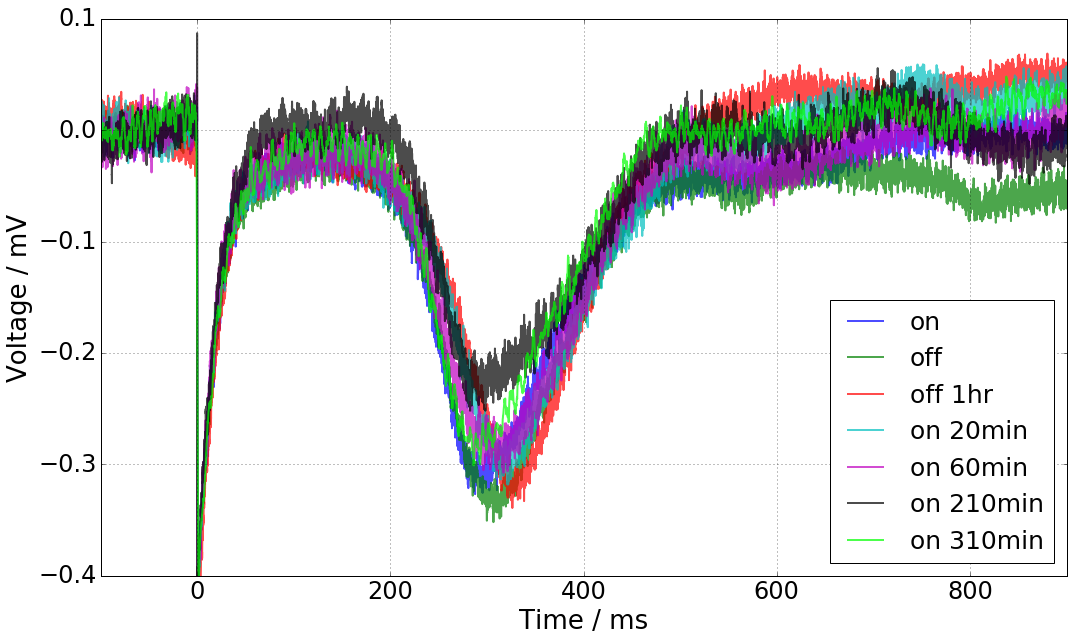

In [164]:
Xvals=[]
Yvals=[]
plt.figure(figsize=(15,9))

EH = 10

XX = moving_average(Xon,n=EH)
YY = moving_average(Yon,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on',alpha=0.7,linewidth=2)

XX = moving_average(Xoff,n=EH)
YY = moving_average(Yoff,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='off',alpha=0.7,linewidth=2)

XX = moving_average(XoffL,n=EH)
YY = moving_average(YoffL,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='off 1hr',alpha=0.7,linewidth=2)

XX = moving_average(Xon20,n=EH)
YY = moving_average(Yon20,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 20min',alpha=0.7,linewidth=2)

XX = moving_average(Xon60,n=EH)
YY = moving_average(Yon60,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 60min',alpha=0.7,linewidth=2)

XX = moving_average(Xon210,n=EH)
YY = moving_average(Yon210,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 210min',alpha=0.7,linewidth=2,color='k')

XX = moving_average(Xon310,n=EH)
YY = moving_average(Yon310,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 310min',alpha=0.7,linewidth=2,color='lime')

plt.xlim(-.1*ml,900)
plt.ylim(-0.4,.1)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('ions-circ-90518.tif')
plt.show()

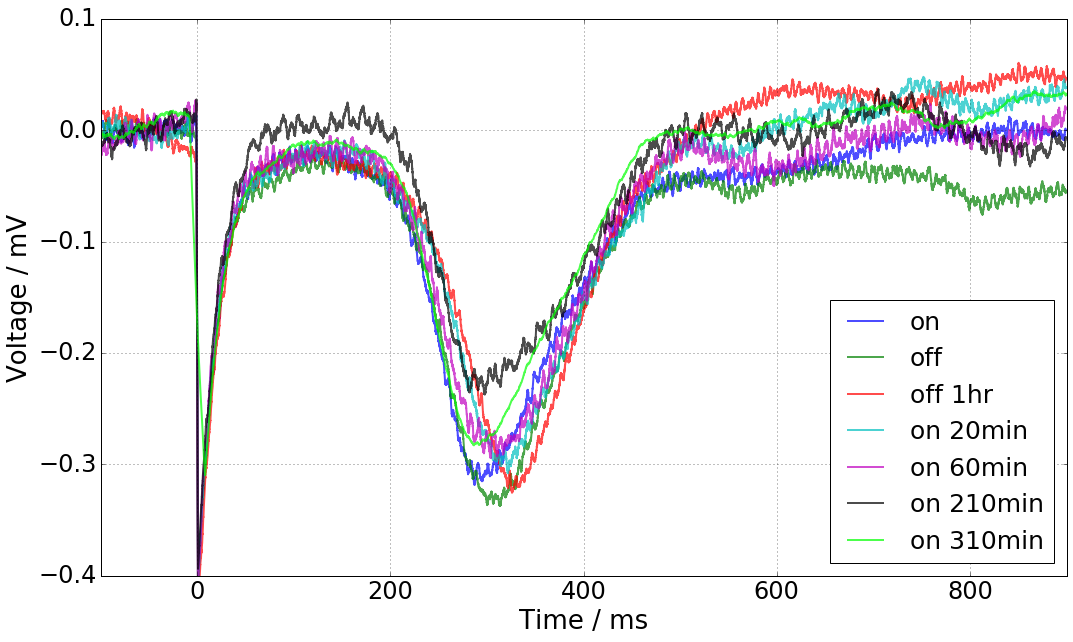

In [175]:
TriggerTime = find_nearest(Xvals[0],0)
Trigger     = np.where(Xvals[0]==TriggerTime)[0][0]
Cut = 2*Trigger


Xvals=[]
Yvals=[]
plt.figure(figsize=(15,9))

EH = 80

XX = moving_average(Xon,n=EH)
YY = moving_average(Yon,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on',alpha=0.7,linewidth=2)

XX = moving_average(Xoff,n=EH)
YY = moving_average(Yoff,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='off',alpha=0.7,linewidth=2)

XX = moving_average(XoffL,n=EH)
YY = moving_average(YoffL,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='off 1hr',alpha=0.7,linewidth=2)

XX = moving_average(Xon20,n=EH)
YY = moving_average(Yon20,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 20min',alpha=0.7,linewidth=2)

XX = moving_average(Xon60,n=EH)
YY = moving_average(Yon60,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 60min',alpha=0.7,linewidth=2)

XX = moving_average(Xon210,n=EH)
YY = moving_average(Yon210,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 210min',alpha=0.7,linewidth=2,color='k')

XX = moving_average(Xon310,n=EH)
YY = moving_average(Yon310,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 310min',alpha=0.7,linewidth=2,color='lime')



plt.xlim(-.1*ml,900)
plt.ylim(-0.4,.1)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('ions-circ-90518.tif')
plt.show()

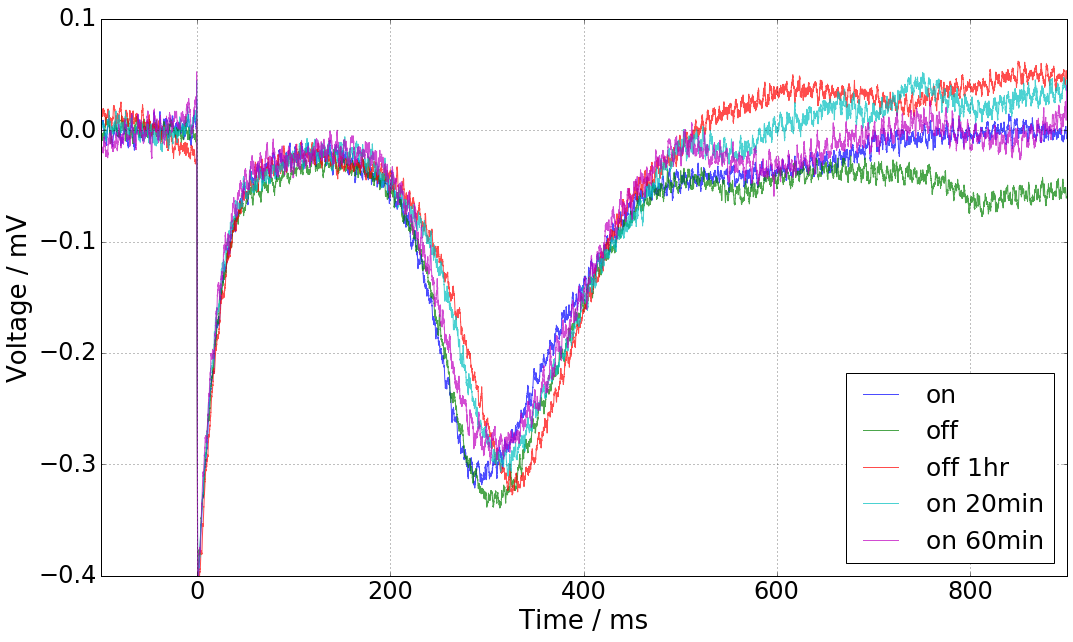

In [100]:
Xvals=[]
Yvals=[]
plt.figure(figsize=(15,9))

P=75
PP=3
XX = savgol_filter(Xon,P,PP)
YY = savgol_filter(Yon,P,PP)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on',alpha=0.7)

XX = savgol_filter(Xoff,P,PP)
YY = savgol_filter(Yoff,P,PP)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='off',alpha=0.7)

XX = savgol_filter(XoffL,P,PP)
YY = savgol_filter(YoffL,P,PP)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='off 1hr',alpha=0.7)

XX = savgol_filter(Xon20,P,PP)
YY = savgol_filter(Yon20,P,PP)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 20min',alpha=0.7)

XX = savgol_filter(Xon60,P,PP)
YY = savgol_filter(Yon60,P,PP)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 60min',alpha=0.7)


plt.xlim(-.1*ml,900)
plt.ylim(-0.4,.1)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('ions-circ-90518.tif')
plt.show()

In [168]:
Yvals

[array([ 0.00285086,  0.00337451,  0.00323535, ...,  0.00019794,
         0.0003195 ,  0.00021939]),
 array([-0.00152541, -0.00130047, -0.00129012, ..., -0.05615454,
        -0.05611152, -0.05607884]),
 array([ 0.01603882,  0.01639827,  0.01638973, ...,  0.04713667,
         0.0471927 ,  0.04698567]),
 array([ 0.00321636,  0.0038579 ,  0.00402341, ...,  0.03794901,
         0.03816748,  0.03847237]),
 array([-0.02231323, -0.02142429, -0.02128241, ...,  0.01951879,
         0.01964188,  0.01959617]),
 array([-0.01293427, -0.01299962, -0.01220203, ..., -0.00695144,
        -0.00664979, -0.00663779]),
 array([-0.00179747, -0.0022159 , -0.00260341, ..., -0.03116585,
        -0.03098049, -0.03035776])]

In [169]:
TriggerTime = find_nearest(Xvals[0],0)
Trigger     = np.where(Xvals[0]==TriggerTime)[0][0]
Cut = 2*Trigger

Velocity=[]
Efield =[]
FWHM  =[]
Time  = []
for q in range(0,len(Xvals)-1):
    time,width = find_vals(Xvals[q],Yvals[q],Cut)
    V      = 20/(time*1e-3)
    Time.append(time)
    Velocity.append(V)
    #Efield.append(float(names[q]))
    FWHM.append(width)
Velocity = np.array(Velocity)
Efield = np.array(Efield)
FWHM = np.array(FWHM)

In [170]:
FWHM

array([ 144.55999635,  145.45999633,  128.15999676,  142.6999964 ,
        149.73999622,  154.4799961 ])

In [171]:
Time

[287.22058114747051,
 313.25956042087637,
 325.9195383140468,
 321.58998934971169,
 303.72998980089324,
 297.72998995246598]

In [173]:
find_vals(Xon310,Yon310,Cut)

(1790.5999497132123, 12.199999691802077)

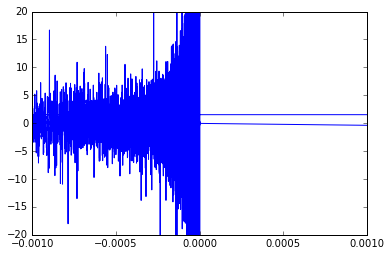

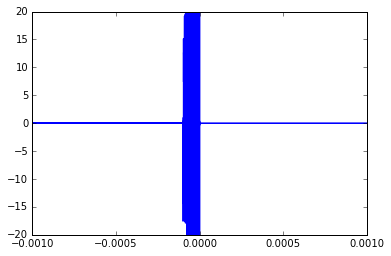

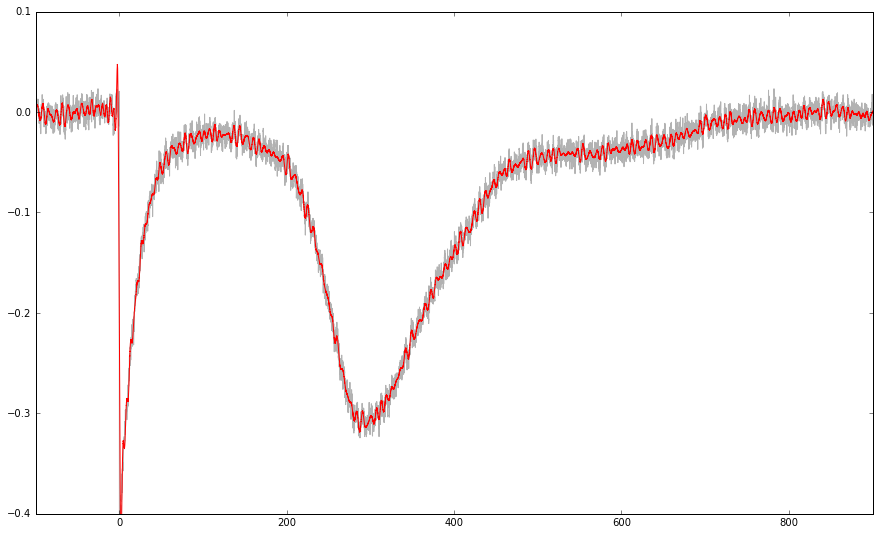

In [64]:
XX = savgol_filter(Xon,P,PP)
YY = savgol_filter(Yon,P,PP)

W = fftfreq(YY.size, d=XX)
f_signal = rfft(YY)

# If our original signal time was in seconds, this is now in Hz    
cut_f_signal = f_signal.copy()
cut_f_signal[(W<-0.0001)] = 0
cut_f_signal[(W>0)] = 0

cut_signal = irfft(cut_f_signal)


plt.plot(W,f_signal)
plt.ylim(-20,20)
#plt.semilogx()
plt.xlim(-.001,.001)
plt.show()

plt.plot(W,cut_f_signal)
plt.ylim(-20,20)
#plt.semilogx()
plt.xlim(-.001,.001)
plt.show()

plt.figure(figsize=(15,9))
plt.plot(XX,YY,label='raw',color='k',alpha=0.3)
plt.plot(XX,cut_signal,label='cut',color='r')
plt.xlim(-.1*ml,900)
plt.ylim(-0.4,.1)
plt.show()

In [47]:
min(W)

-10.622639954678981

In [81]:
names = []
for q in range(0,len(files)):
    na = files[q].split('-')[0]
    names.append(na)
names

['050', '075', '100', '125', '150', '175', '200']

In [82]:
ml = 1e3
Xvals=dict()
Yvals=dict()
for q in range(0,len(files)):
    Hold = np.loadtxt(files[q])
    Xvals[q] = Hold[0]*ml
    Yvals[q] = Hold[1]*ml

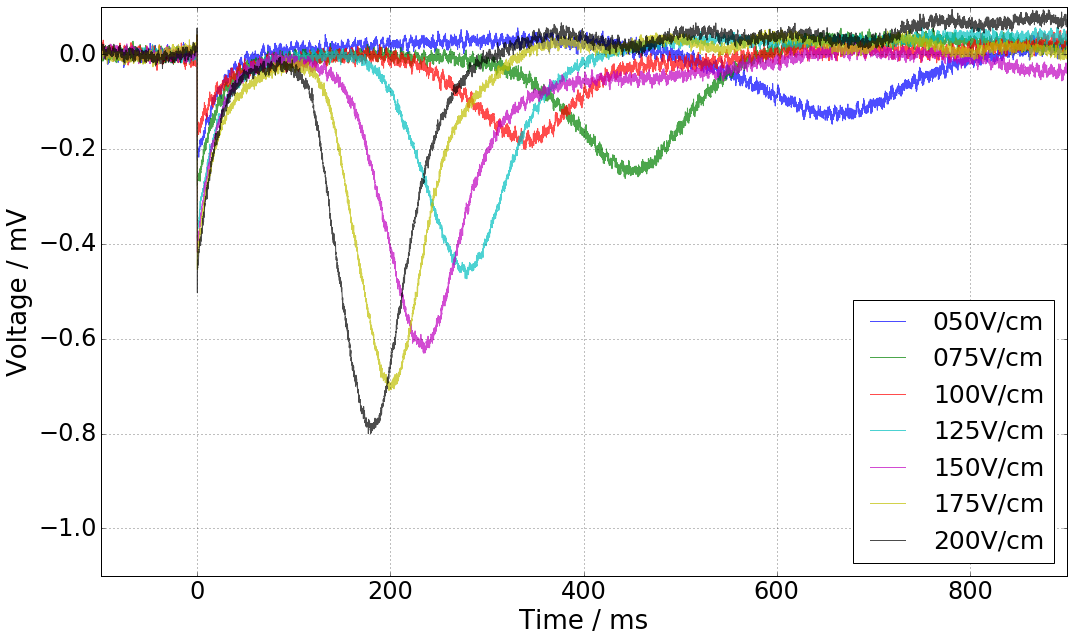

In [83]:
plt.figure(figsize=(15,9))

for q in range(0,len(files)):
    P=21
    PP=3
    XX = savgol_filter(Xvals[q],P,PP)
    YY = savgol_filter(Yvals[q],P,PP)
    plt.plot(XX,YY,label=(names[q]+''+'V/cm'),alpha=0.7)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(-.1*ml,900)
plt.ylim(-1.1,.1)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('ions-clean-90418.tif')
plt.show()

In [84]:
TriggerTime = find_nearest(Xvals[0],0)
Trigger     = np.where(Xvals[0]==TriggerTime)[0][0]
Cut = 2*Trigger


In [85]:
time,width = find_vals(Xvals[0],Yvals[0],Cut)
time

679.24973788293028

In [86]:
TriggerTime = find_nearest(Xvals[0],0)
Trigger     = np.where(Xvals[0]==TriggerTime)[0][0]
Cut = 2*Trigger

Velocity=[]
Efield =[]
FWHM  =[]
for q in range(0,len(files)):
    time,width = find_vals(Xvals[q],Yvals[q],Cut)
    V      = 20/(time*1e-3)
    Velocity.append(V)
    Efield.append(float(names[q]))
    FWHM.append(width)
Velocity = np.array(Velocity)
Efield = np.array(Efield)
FWHM = np.array(FWHM)

In [87]:
FWHM

array([ 123.63999688,  102.9399974 ,  117.53999703,   91.41999769,
         86.77999781,   74.83999811,   74.73999811])

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


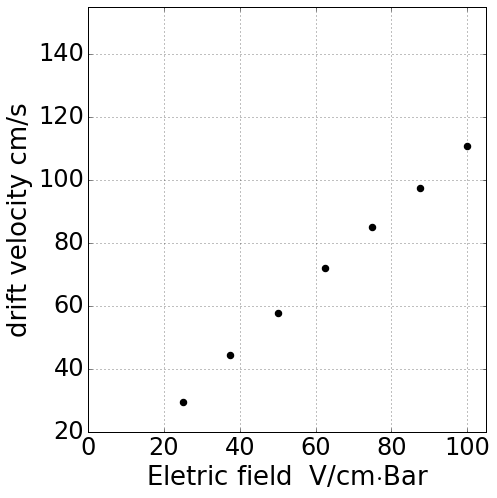

In [88]:
plt.figure(figsize=(7,7))
plt.scatter(Efield/2,Velocity,color='k',linewidth=3)

plt.xlim(0,105)
plt.ylim(20,155)
plt.xlabel(r'Eletric field  V/cm$\cdot$Bar',fontsize=26)
plt.ylabel(r'drift velocity cm/s',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('BTX_ION_drift_ION_5-18-17-2.pdf')
plt.show()

In [89]:
np.polyfit(Efield/2,Velocity,1)

array([ 1.07901032,  3.57677111])

In [90]:
np.polyfit?

In [91]:
poly

array([-0.74427661,  8.15642242])

In [92]:
FWHM[0:6]

array([ 123.63999688,  102.9399974 ,  117.53999703,   91.41999769,
         86.77999781,   74.83999811])

In [93]:
x = np.log(Efield[1:6])
y = np.log(FWHM[1:6])
poly=np.polyfit(x,y,1)

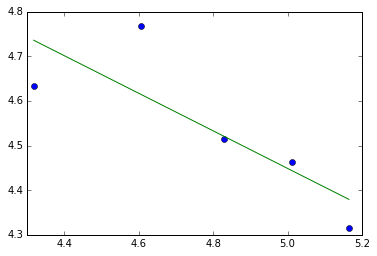

In [94]:
plt.plot(x,y,'o')
plt.plot(x,np.poly1d(poly)(x))

In [96]:
poly

array([-0.42074489,  6.5524051 ])

In [97]:
np.poly1d?

In [98]:
Efield, FWHM = zip(*sorted(zip(Efield, FWHM)))
Efield = np.array(Efield)
FWHM = np.array(FWHM)

In [99]:
def ef(E,a):
    return a/(E)**(4/3)

popt,pcov = curve_fit(ef,Efield,FWHM)
popt
pcov

array([[ 42138408.63023282]])

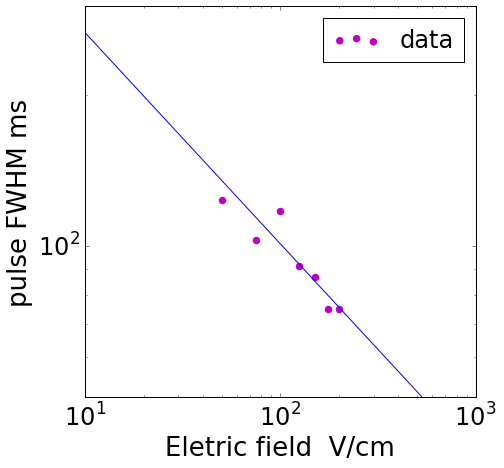

In [100]:
def ef(E,a):
    return a/(E)**(4/3)

popt,pcov = curve_fit(ef,Efield,FWHM)

plt.figure(figsize=(7,7))
plt.scatter(Efield,FWHM,color='m',linewidth=3,label='data')
#plt.plot(Efield,ef(Efield,*popt),'r',label='fit')
x=np.arange(1,30,0.1)
plt.plot(np.exp(x),np.exp(np.poly1d(poly)(x)))

#vars=np.logspace(1,3,10)
#plt.plot(vars,10**np.poly1d(poly)(np.log(vars)))
plt.xlabel(r'Eletric field  V/cm',fontsize=26)
plt.ylabel(r'pulse FWHM ms',fontsize=26)
plt.xlim(10,1000)
plt.ylim(50,300)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(np.arange(50, 210, 25))
plt.loglog()
plt.legend(loc="upper right",fontsize=24)
plt.show()

In [ ]:
TriggerTime = find_nearest(Xvals[0],0)
Trigger     = np.where(Xvals[0]==TriggerTime)[0][0]
Cut = 2*Trigger


Xvals=[]
Yvals=[]
plt.figure(figsize=(15,9))

EH = 80

XX = moving_average(Xon,n=EH)
YY = moving_average(Yon,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on',alpha=0.7,linewidth=2)

XX = moving_average(Xoff,n=EH)
YY = moving_average(Yoff,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='off',alpha=0.7,linewidth=2)

XX = moving_average(XoffL,n=EH)
YY = moving_average(YoffL,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='off 1hr',alpha=0.7,linewidth=2)

XX = moving_average(Xon20,n=EH)
YY = moving_average(Yon20,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 20min',alpha=0.7,linewidth=2)

XX = moving_average(Xon60,n=EH)
YY = moving_average(Yon60,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 60min',alpha=0.7,linewidth=2)

XX = moving_average(Xon210,n=EH)
YY = moving_average(Yon210,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 210min',alpha=0.7,linewidth=2,color='k')

XX = moving_average(Xon310,n=EH)
YY = moving_average(Yon310,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY,label='on 310min',alpha=0.7,linewidth=2,color='lime')



plt.xlim(-.1*ml,900)
plt.ylim(-0.4,.1)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('ions-circ-90518.tif')
plt.show()